In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os 
import matplotlib.pyplot as plt

In [2]:
directorio = os.path.dirname(os.getcwd())

In [3]:
baches = gpd.read_file(directorio + '/data/processed/tidy_baches_agebs_hmo.shp')
baches.CVEGEO = baches.CVEGEO.str[-4:]
se_ageb = gpd.read_file(directorio + '/data/processed/tidy_socioeconimico_ageb_hermosillo.shp')
se = pd.read_csv(directorio + '/data/processed/tidy_socioeconomico_hermosillo.csv')


In [4]:
se_ageb.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

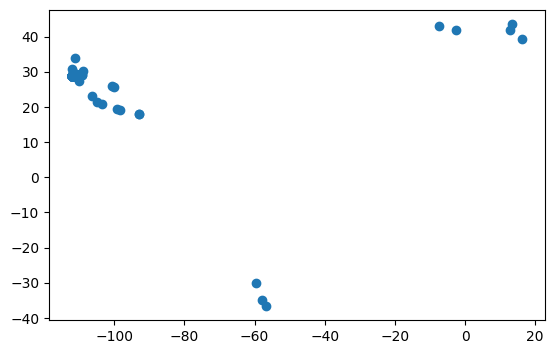

In [5]:
baches.plot()

In [6]:
total_baches_ageb = baches.groupby('CVEGEO',as_index=False).size().sort_values(by="size")

In [7]:
total_baches_ageb = se_ageb.merge(total_baches_ageb, on='CVEGEO', how='left')

In [8]:
total_baches_ageb['total_baches'] = total_baches_ageb['size'] 
total_baches_ageb = total_baches_ageb.drop(columns=['size']) 

In [9]:
total_baches_ageb.total_baches.fillna(0,inplace=True)

/tmp/ipykernel_6791/1455996039.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  total_baches_ageb.total_baches.fillna(0,inplace=True)


#### Aquí veamos las AGEBS con mayor número de baches

In [10]:
total_baches_ageb.sort_values(by='total_baches', ascending=False).head(10)

,CVEGEO,POB_TOT,IM_2020,GM_2020,IMN_2020,geometry,total_baches
241,2710,8006,126.351538,Muy bajo,0.987011,"POLYGON ((-110.99039 29.07243, -110.98956 29.0...",237.0
2,2246,14443,123.411364,Bajo,0.964043,"POLYGON ((-111.02225 29.11919, -111.02225 29.1...",213.0
14,1873,2237,125.758180,Muy bajo,0.982376,"POLYGON ((-110.96018 29.10952, -110.95867 29.1...",204.0
240,2655,1860,126.310199,Muy bajo,0.986688,"POLYGON ((-110.9898 29.08529, -110.99126 29.08...",192.0
52,5240,728,123.005041,Bajo,0.960869,"POLYGON ((-110.9529 29.08382, -110.95289 29.08...",192.0
62,4863,8169,124.630666,Muy bajo,0.973568,"POLYGON ((-110.95917 29.14553, -110.95916 29.1...",186.0
36,2443,3672,125.877643,Muy bajo,0.983309,"POLYGON ((-110.95401 29.12302, -110.95299 29.1...",178.0
258,3371,2021,119.722774,Medio,0.935229,"POLYGON ((-110.95465 29.06375, -110.95473 29.0...",177.0
85,3032,726,126.052970,Muy bajo,0.984679,"POLYGON ((-110.95807 29.08072, -110.95803 29.0...",176.0
97,2890,2769,124.244193,Muy bajo,0.970549,"POLYGON ((-110.9866 29.12137, -110.98568 29.12...",172.0


#### Creamos una lista con los AGEB con mayo numero de baches

In [11]:
ageb_mas_baches = total_baches_ageb.sort_values(by='total_baches', ascending=False)['CVEGEO']
ageb_mas_baches = ageb_mas_baches.head(10).to_list()

#### Cambiamos el crs del dataframe $total\_baches\_ageb$ para calcular el áera en metros cuadrados", y lo regresamos al crs 4326

In [12]:
total_baches_ageb = total_baches_ageb.to_crs("EPSG:32614")
total_baches_ageb['area_ageb'] = total_baches_ageb.geometry.area 
total_baches_ageb['area_ageb'] = total_baches_ageb['area_ageb'].round(2)
total_baches_ageb = total_baches_ageb.to_crs("EPSG:4326")

#### Graficamos los 10 AGEB con mas baches

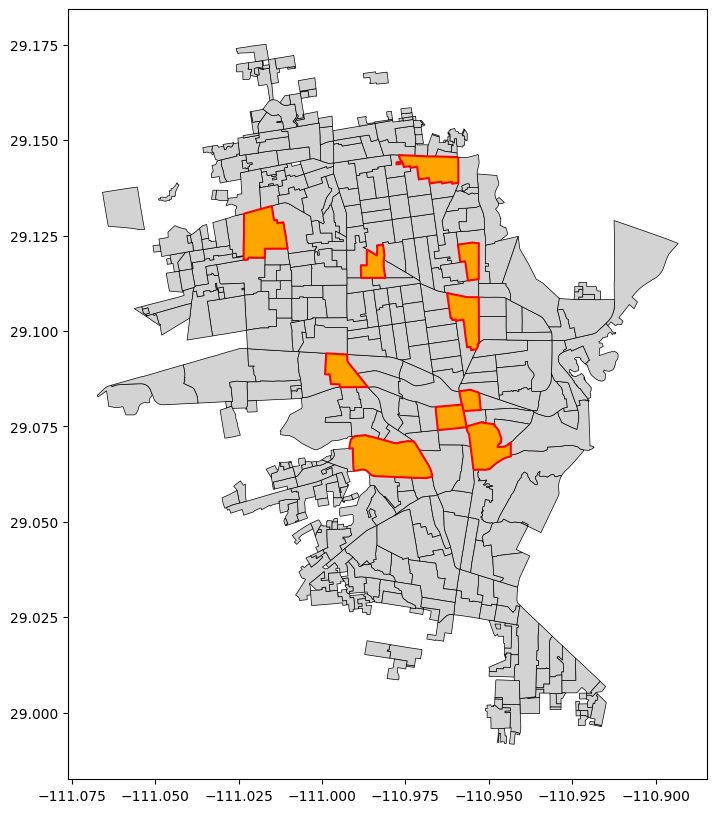

In [13]:
total_baches_ageb['es_destacada'] = total_baches_ageb['CVEGEO'].isin(ageb_mas_baches)

# Graficar
fig, ax = plt.subplots(figsize=(10, 10))
total_baches_ageb[~total_baches_ageb['es_destacada']].plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.5)  # Colonias no destacadas
total_baches_ageb[total_baches_ageb['es_destacada']].plot(ax=ax, color='orange', edgecolor='red', linewidth=1.5)        # Colonias destacadas

plt.show()
total_baches_ageb = total_baches_ageb.drop(columns=['es_destacada'])

In [14]:
total_baches_ageb[total_baches_ageb.total_baches == 0]

,CVEGEO,POB_TOT,IM_2020,GM_2020,IMN_2020,geometry,total_baches,area_ageb
140,5664,1156,124.168472,Muy bajo,0.969958,"POLYGON ((-110.93163 29.00149, -110.93163 29.0...",0.0,87229.33
157,5895,89,117.785721,Alto,0.920098,"POLYGON ((-110.99342 29.03449, -110.99355 29.0...",0.0,23588.26
158,5908,64,121.630978,Bajo,0.950136,"POLYGON ((-111.01492 29.13997, -111.01361 29.1...",0.0,6649.04
160,6874,628,114.974862,Muy alto,0.898141,"POLYGON ((-110.97353 29.02747, -110.97329 29.0...",0.0,58854.89
163,5927,397,120.621359,Medio,0.942249,"POLYGON ((-110.92185 29.10958, -110.92066 29.1...",0.0,64469.78
...,...,...,...,...,...,...,...,...
389,7406,92,107.881809,Muy alto,0.842732,"POLYGON ((-110.994 29.03044, -110.99467 29.030...",0.0,147803.36
393,896A,305,99.450176,Muy alto,0.776867,"POLYGON ((-110.98885 29.15381, -110.98895 29.1...",0.0,68036.87
400,8921,222,98.191425,Muy alto,0.767035,"POLYGON ((-111.04899 29.13464, -111.04843 29.1...",0.0,91874.27
401,8936,106,111.785187,Muy alto,0.873224,"POLYGON ((-111.06553 29.13469, -111.06577 29.1...",0.0,1196942.17


In [15]:
total_baches_ageb.groupby('GM_2020').size()

GM_2020
Alto          9
Bajo        123
Medio        30
Muy alto     12
Muy bajo    230
dtype: int64

In [16]:
total_baches_ageb[(total_baches_ageb.total_baches == 0)].groupby('GM_2020').size()

GM_2020
Alto         8
Bajo        11
Medio        9
Muy alto    12
Muy bajo    25
dtype: int64

#### Cero baches reportados en las siguientes AGEBS

In [25]:
cero_bache = total_baches_ageb[total_baches_ageb.total_baches == 0]['CVEGEO'].to_list()
total_baches_ageb[total_baches_ageb.total_baches == 0]

,CVEGEO,POB_TOT,IM_2020,GM_2020,IMN_2020,geometry,total_baches,area_ageb,baches_por_metro2
140,5664,1156,124.168472,Muy bajo,0.969958,"POLYGON ((-110.93163 29.00149, -110.93163 29.0...",0.0,87229.33,0.0
157,5895,89,117.785721,Alto,0.920098,"POLYGON ((-110.99342 29.03449, -110.99355 29.0...",0.0,23588.26,0.0
158,5908,64,121.630978,Bajo,0.950136,"POLYGON ((-111.01492 29.13997, -111.01361 29.1...",0.0,6649.04,0.0
160,6874,628,114.974862,Muy alto,0.898141,"POLYGON ((-110.97353 29.02747, -110.97329 29.0...",0.0,58854.89,0.0
163,5927,397,120.621359,Medio,0.942249,"POLYGON ((-110.92185 29.10958, -110.92066 29.1...",0.0,64469.78,0.0
...,...,...,...,...,...,...,...,...,...
389,7406,92,107.881809,Muy alto,0.842732,"POLYGON ((-110.994 29.03044, -110.99467 29.030...",0.0,147803.36,0.0
393,896A,305,99.450176,Muy alto,0.776867,"POLYGON ((-110.98885 29.15381, -110.98895 29.1...",0.0,68036.87,0.0
400,8921,222,98.191425,Muy alto,0.767035,"POLYGON ((-111.04899 29.13464, -111.04843 29.1...",0.0,91874.27,0.0
401,8936,106,111.785187,Muy alto,0.873224,"POLYGON ((-111.06553 29.13469, -111.06577 29.1...",0.0,1196942.17,0.0


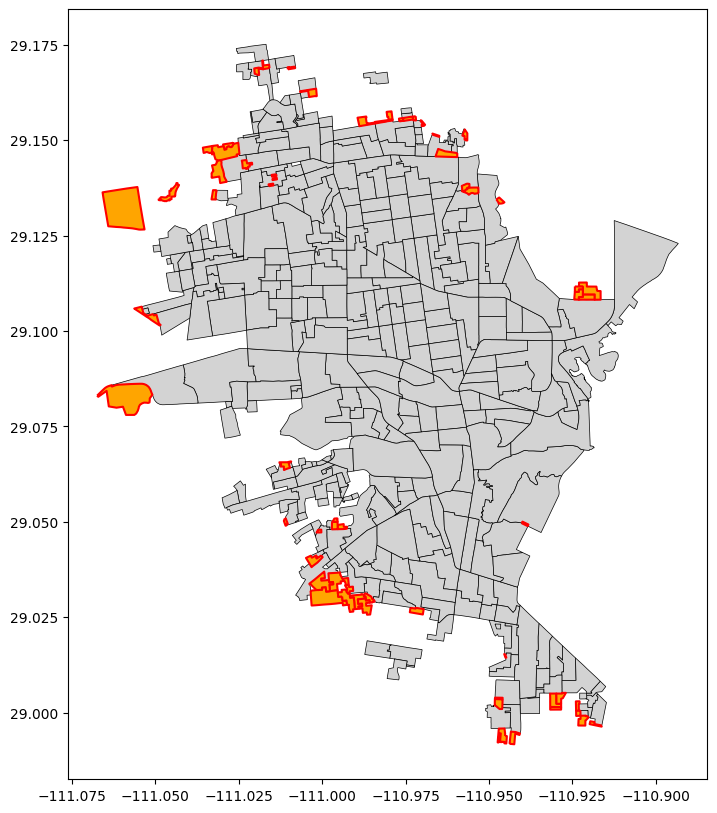

In [24]:
total_baches_ageb['es_destacada'] = total_baches_ageb['CVEGEO'].isin(cero_bache)

# Graficar
fig, ax = plt.subplots(figsize=(10, 10))
total_baches_ageb[~total_baches_ageb['es_destacada']].plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.5)  # Colonias no destacadas
total_baches_ageb[total_baches_ageb['es_destacada']].plot(ax=ax, color='orange', edgecolor='red', linewidth=1.5)        # Colonias destacadas

plt.show()
total_baches_ageb = total_baches_ageb.drop(columns=['es_destacada'])

#### Un bache reportado ern las siguientes AGEBS

In [29]:
un_bache = total_baches_ageb[total_baches_ageb.total_baches < 11]['CVEGEO'].to_list()
total_baches_ageb[total_baches_ageb.total_baches < 11]

,CVEGEO,POB_TOT,IM_2020,GM_2020,IMN_2020,geometry,total_baches,area_ageb,baches_por_metro2
41,2481,870,121.946982,Bajo,0.952604,"POLYGON ((-110.91241 29.11269, -110.9123 29.11...",10.0,3044083.36,0.000003
134,5594,2608,122.930170,Bajo,0.960284,"POLYGON ((-110.99655 29.14318, -110.99656 29.1...",7.0,292887.01,0.000024
140,5664,1156,124.168472,Muy bajo,0.969958,"POLYGON ((-110.93163 29.00149, -110.93163 29.0...",0.0,87229.33,0.000000
142,5679,460,126.727713,Muy bajo,0.989949,"POLYGON ((-110.93478 29.004, -110.93505 29.003...",3.0,50458.84,0.000059
149,5753,152,124.325251,Muy bajo,0.971182,"POLYGON ((-110.9207 29.00493, -110.92071 29.00...",10.0,97307.06,0.000103
...,...,...,...,...,...,...,...,...,...
395,889A,2080,121.907036,Bajo,0.952292,"POLYGON ((-111.02994 29.05614, -111.02998 29.0...",7.0,161134.46,0.000043
399,8917,721,123.924716,Muy bajo,0.968053,"POLYGON ((-111.04865 29.12255, -111.04832 29.1...",8.0,39855.69,0.000201
400,8921,222,98.191425,Muy alto,0.767035,"POLYGON ((-111.04899 29.13464, -111.04843 29.1...",0.0,91874.27,0.000000
401,8936,106,111.785187,Muy alto,0.873224,"POLYGON ((-111.06553 29.13469, -111.06577 29.1...",0.0,1196942.17,0.000000


In [31]:
total_baches_ageb[total_baches_ageb.total_baches < 11].groupby('GM_2020').size()

GM_2020
Alto         8
Bajo        33
Medio       16
Muy alto    12
Muy bajo    65
dtype: int64

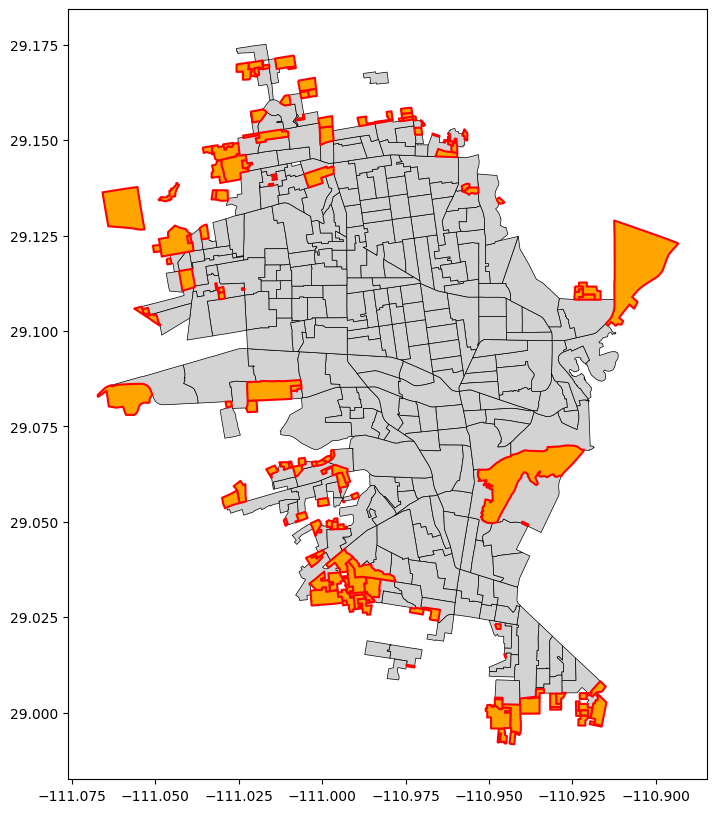

In [30]:
total_baches_ageb['es_destacada'] = total_baches_ageb['CVEGEO'].isin(un_bache)

# Graficar
fig, ax = plt.subplots(figsize=(10, 10))
total_baches_ageb[~total_baches_ageb['es_destacada']].plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.5)  # Colonias no destacadas
total_baches_ageb[total_baches_ageb['es_destacada']].plot(ax=ax, color='orange', edgecolor='red', linewidth=1.5)        # Colonias destacadas

plt.show()
total_baches_ageb = total_baches_ageb.drop(columns=['es_destacada'])

#### Calculamos el numero de baches po metro cuadrado

In [20]:
total_baches_ageb['baches_por_metro2'] = total_baches_ageb.total_baches / total_baches_ageb.area_ageb

In [21]:
baches_por_area = total_baches_ageb.sort_values(by='baches_por_metro2',ascending=False).head(10)['CVEGEO'].to_list()

#### Graficamos el las 10 AGEBS con más baches por metro cuadrado

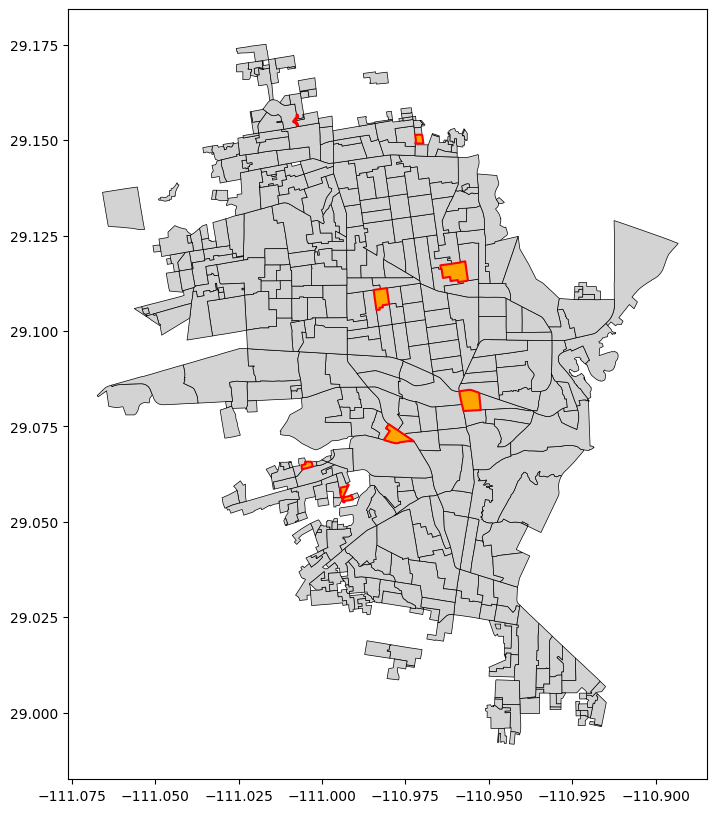

In [22]:
total_baches_ageb['es_destacada'] = total_baches_ageb['CVEGEO'].isin(baches_por_area)

# Graficar
fig, ax = plt.subplots(figsize=(10, 10))
total_baches_ageb[~total_baches_ageb['es_destacada']].plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.5)  # Colonias no destacadas
total_baches_ageb[total_baches_ageb['es_destacada']].plot(ax=ax, color='orange', edgecolor='red', linewidth=1.5)        # Colonias destacadas

plt.show()
total_baches_ageb = total_baches_ageb.drop(columns=['es_destacada'])

In [23]:
total_baches_ageb[total_baches_ageb.total_baches == 0]

,CVEGEO,POB_TOT,IM_2020,GM_2020,IMN_2020,geometry,total_baches,area_ageb,baches_por_metro2
140,5664,1156,124.168472,Muy bajo,0.969958,"POLYGON ((-110.93163 29.00149, -110.93163 29.0...",0.0,87229.33,0.0
157,5895,89,117.785721,Alto,0.920098,"POLYGON ((-110.99342 29.03449, -110.99355 29.0...",0.0,23588.26,0.0
158,5908,64,121.630978,Bajo,0.950136,"POLYGON ((-111.01492 29.13997, -111.01361 29.1...",0.0,6649.04,0.0
160,6874,628,114.974862,Muy alto,0.898141,"POLYGON ((-110.97353 29.02747, -110.97329 29.0...",0.0,58854.89,0.0
163,5927,397,120.621359,Medio,0.942249,"POLYGON ((-110.92185 29.10958, -110.92066 29.1...",0.0,64469.78,0.0
...,...,...,...,...,...,...,...,...,...
389,7406,92,107.881809,Muy alto,0.842732,"POLYGON ((-110.994 29.03044, -110.99467 29.030...",0.0,147803.36,0.0
393,896A,305,99.450176,Muy alto,0.776867,"POLYGON ((-110.98885 29.15381, -110.98895 29.1...",0.0,68036.87,0.0
400,8921,222,98.191425,Muy alto,0.767035,"POLYGON ((-111.04899 29.13464, -111.04843 29.1...",0.0,91874.27,0.0
401,8936,106,111.785187,Muy alto,0.873224,"POLYGON ((-111.06553 29.13469, -111.06577 29.1...",0.0,1196942.17,0.0


#### Baches por Poblacion de AGEB

In [ ]:
total_baches_ageb['baches_por_pob'] = total_baches_ageb.total_baches / total_baches_ageb.POB_TOT

In [41]:
total_baches_ageb.sort_values(by="baches_por_pob").head(10)

,CVEGEO,POB_TOT,IM_2020,GM_2020,IMN_2020,geometry,total_baches,area_ageb,baches_por_metro2,baches_por_pob
376,8508,130,125.198310,Muy bajo,0.978002,"POLYGON ((-111.03159 29.13688, -111.03165 29.1...",0.0,30700.62,0.0,0.0
377,8527,64,117.421079,Alto,0.917249,"POLYGON ((-111.03107 29.14463, -111.03019 29.1...",0.0,161928.71,0.0,0.0
374,8461,442,122.155316,Bajo,0.954232,"POLYGON ((-111.05055 29.10445, -111.05051 29.1...",0.0,56599.31,0.0,0.0
381,8635,2041,122.085853,Bajo,0.953689,"POLYGON ((-111.01025 29.16854, -111.01036 29.1...",0.0,10672.04,0.0,0.0
355,8141,452,121.855901,Bajo,0.951893,"POLYGON ((-110.99536 29.04937, -110.99536 29.0...",0.0,36712.15,0.0,0.0
385,8758,275,121.265671,Bajo,0.947282,"POLYGON ((-111.05402 29.10455, -111.05586 29.1...",0.0,32160.76,0.0,0.0
384,8673,87,125.004022,Muy bajo,0.976485,"POLYGON ((-110.99688 29.04998, -110.99633 29.0...",0.0,11848.15,0.0,0.0
339,8391,89,107.108937,Muy alto,0.836695,"POLYGON ((-111.00347 29.03196, -111.00169 29.0...",0.0,381537.19,0.0,0.0
340,7641,180,121.512412,Bajo,0.949209,"POLYGON ((-111.01111 29.05086, -111.01091 29.0...",0.0,13371.11,0.0,0.0
341,7637,279,120.637306,Medio,0.942373,"POLYGON ((-110.99533 29.04807, -110.99534 29.0...",0.0,30605.31,0.0,0.0


In [38]:
baches_pob = total_baches_ageb.sort_values(by="baches_por_pob", ascending=False)['CVEGEO'].head(10).to_list()

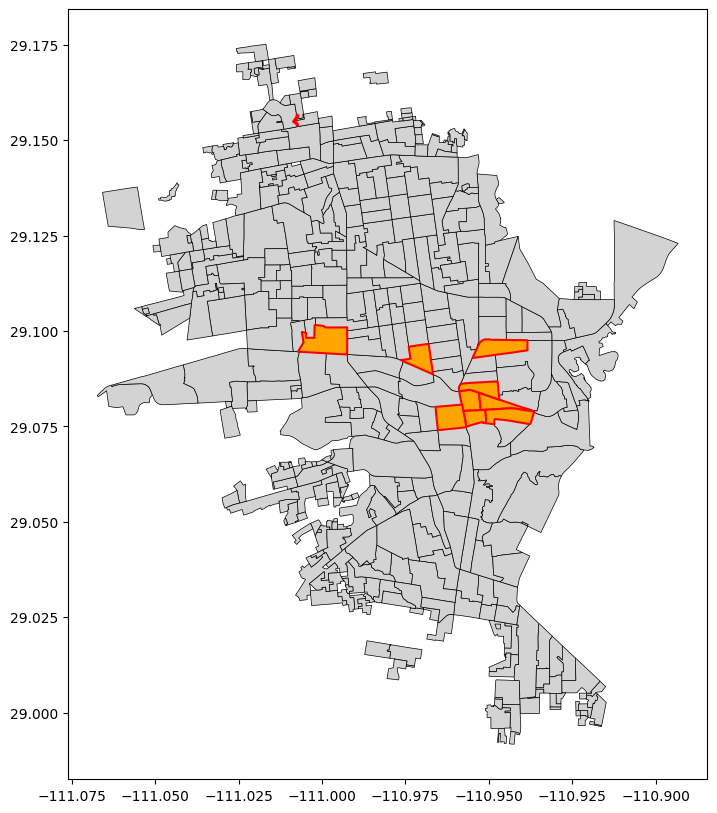

In [39]:
total_baches_ageb['es_destacada'] = total_baches_ageb['CVEGEO'].isin(baches_pob)

# Graficar
fig, ax = plt.subplots(figsize=(10, 10))
total_baches_ageb[~total_baches_ageb['es_destacada']].plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.5)  # Colonias no destacadas
total_baches_ageb[total_baches_ageb['es_destacada']].plot(ax=ax, color='orange', edgecolor='red', linewidth=1.5)        # Colonias destacadas

plt.show()
total_baches_ageb = total_baches_ageb.drop(columns=['es_destacada'])

In [44]:
import zipfile
import requests
import shutil
#Obtenemos el directorio de baches_hermosillo
directorio = os.path.dirname(os.getcwd())

In [45]:
#Descargando el archivo zip de las agebs
url = 'https://www.inegi.org.mx/contenidos/productos/prod_serv/contenidos/espanol/bvinegi/productos/geografia/urbana/SHP_2/Sonora/702825317744_s.zip'

if not os.path.exists(directorio + '/data/raw/agebs_hmo.zip'):
    if not os.path.exists(directorio + '/data/raw'):
        if not os.path.exists(directorio + '/data'):
            os.makedirs(directorio + '/data')
        os.makedirs(directorio + '/data/raw')
    r = requests.get(url, allow_redirects=True) 
    open(directorio + '/data/raw/agebs_hmo.zip', 'wb').write(r.content)

In [46]:
# Descomprimir agebs_hmo.zip y eliminar archivos inecesarios
datos = '/data/raw/agebs_hmo'
archivo_ageb = '/data/raw/agebs_hmo.zip'
hmo_ageb = ['.html', 'v.dbf','v.prj','v.shp', 'v.shp.xml', 'v.dbf', 'v.shx']

if not os.path.exists(directorio + datos):
    with zipfile.ZipFile(directorio + archivo_ageb, 'r') as zip_ref:
        zip_ref.extractall(path= directorio + datos)

with zipfile.ZipFile(directorio + datos + '/260300001.zip') as zip_ref:
    for archivo in hmo_ageb:
        if not os.path.exists(directorio + datos + '260300001' + archivo):
            zip_ref.extract('260300001' + archivo, directorio + '/data/raw')


shutil.rmtree(directorio + datos)
os.remove(directorio +'/data/raw/agebs_hmo.zip')


In [47]:
hmo_via =  gpd.read_file(directorio + '/data/raw/260300001v.shp')
hmo_via.head()

,GEOGRAFICO,TIPOVIAL,NOMVIAL,SENTIDO,DESTINO,CODIGO,FECHAACT,INSTITUC,GEOMETRIA,geometry
0,VIALIDAD,AVENIDA,OTHÓN ALMADA,DOS SENTIDOS,N/A,3144,12/2007,INEGI,LÍNEA,"LINESTRING (1628858.427 1920026.98, 1628800.63..."
1,VIALIDAD,AVENIDA,JOSÉ CARMELO,DOS SENTIDOS,N/A,3144,12/2007,INEGI,LÍNEA,"LINESTRING (1629008.177 1919918.462, 1628960.7..."
2,VIALIDAD,CALLE,DE LA REFORMA,DOS SENTIDOS,N/A,3164,12/2007,INEGI,LÍNEA,"LINESTRING (1628141.372 1919733.671, 1628136.2..."
3,VIALIDAD,CALLE,GENERAL MIGUEL PIÑA,DOS SENTIDOS,N/A,3164,12/2007,INEGI,LÍNEA,"LINESTRING (1628527.419 1919765.336, 1628523.0..."
4,VIALIDAD,CALLE,GUADALUPE VICTORIA,DOS SENTIDOS,N/A,3164,12/2007,INEGI,LÍNEA,"LINESTRING (1628330.694 1919749.357, 1628326.7..."


In [48]:
hmo_via.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 11778 entries, 0 to 11777
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   GEOGRAFICO  11778 non-null  object  
 1   TIPOVIAL    11778 non-null  object  
 2   NOMVIAL     11778 non-null  object  
 3   SENTIDO     11778 non-null  object  
 4   DESTINO     11778 non-null  object  
 5   CODIGO      11778 non-null  int32   
 6   FECHAACT    11778 non-null  object  
 7   INSTITUC    11778 non-null  object  
 8   GEOMETRIA   11778 non-null  object  
 9   geometry    11778 non-null  geometry
dtypes: geometry(1), int32(1), object(8)
memory usage: 874.3+ KB
